### data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dt = pd.read_csv("house-rent.csv")
dt.head(6)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


Data Types

In [3]:
dt.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point Of Contact     object
dtype: object

#### Describe dataset

In [4]:
# show statistical summary of numerical type variables
dt.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
# show statistical summary of all variables
dt.describe(include="all")

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


#### select columns BHK and Rent

In [6]:
dt[["BHK","Rent"]].describe()

,BHK,Rent
count,4746.000000,4.746000e+03
mean,2.083860,3.499345e+04
std,0.832256,7.810641e+04
min,1.000000,1.200000e+03
25%,2.000000,1.000000e+04
50%,2.000000,1.600000e+04
75%,3.000000,3.300000e+04
max,6.000000,3.500000e+06


#### Info
another method to check for summary

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point Of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### Evaluating for missing data

In [8]:
missing_data = dt.isnull()
missing_data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


True means value is missing <br>
False means value is not missing

#### Count missing values for each column

In [9]:
for column in missing_data.columns.values.tolist():
    # print(column)
    print(missing_data[column].value_counts())
    print()

Posted On
False    4746
Name: count, dtype: int64

BHK
False    4746
Name: count, dtype: int64

Rent
False    4746
Name: count, dtype: int64

Size
False    4746
Name: count, dtype: int64

Floor
False    4746
Name: count, dtype: int64

Area Type
False    4746
Name: count, dtype: int64

Area Locality
False    4746
Name: count, dtype: int64

City
False    4746
Name: count, dtype: int64

Furnishing Status
False    4746
Name: count, dtype: int64

Tenant Preferred
False    4746
Name: count, dtype: int64

Bathroom
False    4746
Name: count, dtype: int64

Point Of Contact
False    4746
Name: count, dtype: int64



Based on summary above, none of the columns have missing data <br>
the count of "False" in each column is 4746 and there are "True" values in any column

#### deal with missing values
for numeric variables - replace with mean <br>
for categorical variables - replace with frequency <br>
if any data is missing in response variable (Rent) , drop those entire rows <br>

#### missing values in 'BHK'

In [10]:
avg_BHK = dt["BHK"].astype("int").mean(axis=0)
print("average of BHK : ",round(avg_BHK,2))

average of BHK :  2.08


In [11]:
dt["BHK"].replace(np.nan,avg_BHK,inplace=True)

#### missing values in 'Size'

In [12]:
avg_size = dt["Size"].astype("int").mean(axis=0)
print("average of size : ",round(avg_size,2))

average of size :  967.49


In [13]:
dt["Size"].replace(np.nan,avg_size,inplace=True)

#### missing values in 'Floor'

In [14]:
dt["Floor"].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [15]:
dt["Floor"].value_counts().idxmax()

'1 out of 2'

In [16]:
dt["Floor"].replace(np.nan,'1 out of 2',inplace=True)

#### missing values in 'Area Type'

In [17]:
dt["Area Type"].value_counts().idxmax()

'Super Area'

In [18]:
dt["Area Type"].replace(np.nan,'Super Area',inplace=True)

#### dropping rows that do not have 'Rent' data

In [19]:
dt.dropna(subset=['Rent'],axis=0,inplace=True)

In [20]:
# reset index cause we dropped two rows
dt.reset_index(drop=True,inplace=True)

In [21]:
dt

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


#### correct data format

.dtypes to check data types <br>
.astype() to change data types

In [22]:
dt.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point Of Contact     object
dtype: object

In [23]:
dt["Rent"] = dt["Rent"].astype("float")
dt[["BHK","Size"]] = dt[["BHK","Size"]].astype("int")
dt[["Point Of Contact","Area Locality","City"]] = dt[["Point Of Contact","Area Locality","City"]].astype("object")
dt["Posted On"] = pd.to_datetime(dt["Posted On"])

In [24]:
dt.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                        float64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point Of Contact             object
dtype: object

In [25]:
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
0,2022-05-18,2,10000.0,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000.0,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000.0,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000.0,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500.0,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Data Standardization
converting data to a common format <br>
here in this dataset , all variables are in correct format <br>
we assume 'Rent' is represented in terms of Rupees <br>
and 'Size' is in terms of square feet <br>
all other variables are mostly categorical (object)

#### Data Normalization
bringing variable values in the range [0,1] <br>
to have mean 0 and/or variance 1 or variance varies b/w 0 to 1 <br>
let us try normalizing 'Size' variable

In [26]:
dt1 = dt.copy()
dt1["Size"] = dt1["Size"]/dt1["Size"].max()
dt1.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
0,2022-05-18,2,10000.0,0.13750,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000.0,0.10000,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000.0,0.12500,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000.0,0.10000,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500.0,0.10625,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [27]:
dt1["Size"].describe()

count    4746.000000
mean        0.120936
std         0.079275
min         0.001250
25%         0.068750
50%         0.106250
75%         0.150000
max         1.000000
Name: Size, dtype: float64

#### Binning
converting continuous variable to categorical variables <br>
by dividing them into bins

In [28]:
dt["Size"].value_counts().size

615

In [29]:
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point Of Contact
0,2022-05-18,2,10000.0,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000.0,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000.0,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000.0,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500.0,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Text(0.5, 1.0, 'flat size bins')

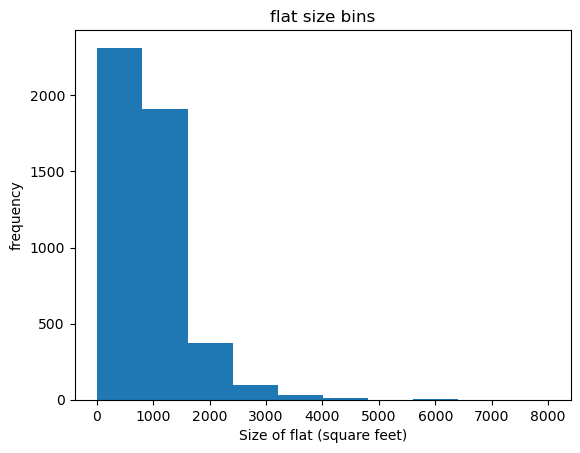

In [30]:
%matplotlib inline
plt.hist(dt["Size"])
plt.xlabel("Size of flat (square feet)")
plt.ylabel("frequency")
plt.title("flat size bins")

In [31]:
bins = np.linspace(min(dt["Size"]),max(dt["Size"]),4)
bins

array([  10.        , 2673.33333333, 5336.66666667, 8000.        ])

In [32]:
group_names = ["Small","Compact","Large"]
group_names

['Small', 'Compact', 'Large']

In [33]:
dt["Size-binned"] = pd.cut(dt["Size"],bins,labels=group_names,include_lowest=True)
dt[["Size","Size-binned"]].head()

,Size,Size-binned
0,1100,Small
1,800,Small
2,1000,Small
3,800,Small
4,850,Small


In [34]:
dt["Size-binned"].value_counts()

Size-binned
Small      4629
Compact     113
Large         4
Name: count, dtype: int64

Text(0.5, 1.0, 'Flat size binned')

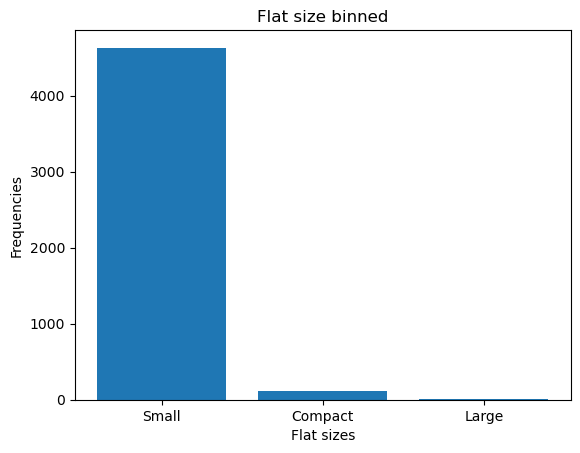

In [35]:
%matplotlib inline
plt.bar(group_names,dt["Size-binned"].value_counts())
plt.xlabel("Flat sizes")
plt.ylabel("Frequencies")
plt.title("Flat size binned")

Text(0.5, 1.0, 'Flat size binned')

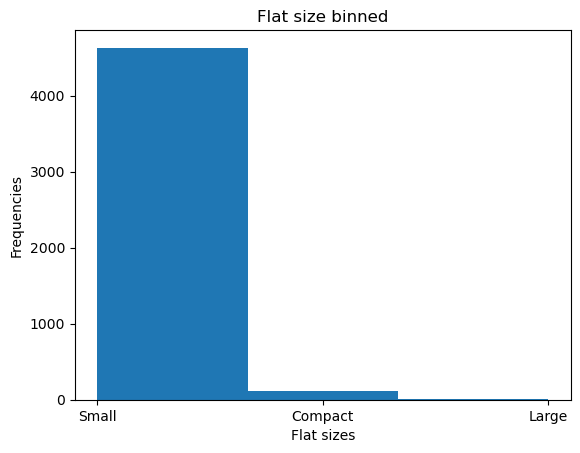

In [36]:
%matplotlib inline
plt.hist(dt["Size-binned"],bins=3)
plt.xlabel("Flat sizes")
plt.ylabel("Frequencies")
plt.title("Flat size binned")

Binning variable "Rent"

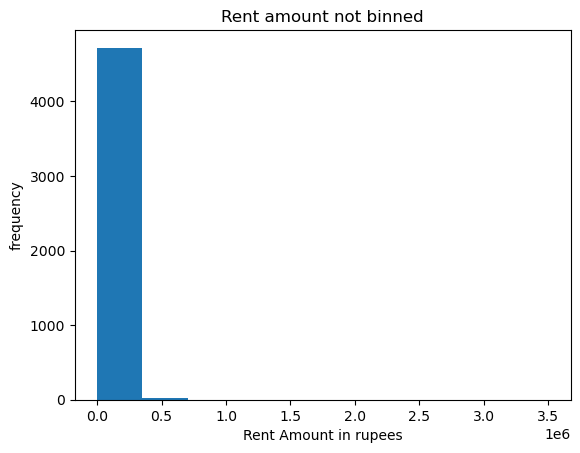

In [37]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.hist(dt["Rent"])
ax.set_title("Rent amount not binned")
ax.set_ylabel("frequency")
ax.set_xlabel("Rent Amount in rupees")
plt.show()

Note that too many values are packed into one category. Therefore in such situations we use logscale on y-axis to make
the chart more representative of the data.

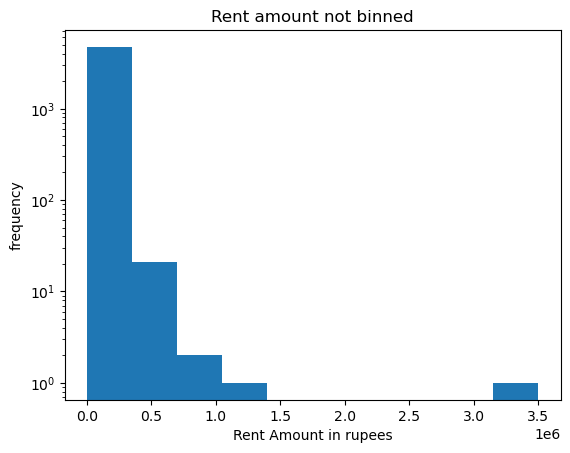

In [38]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.hist(dt["Rent"])
ax.set_title("Rent amount not binned")
ax.set_ylabel("frequency")
ax.set_xlabel("Rent Amount in rupees")
plt.semilogy()
plt.show()

In [39]:
bins1 = np.linspace(min(dt["Rent"]),max(dt["Rent"]),4)
np.set_printoptions(suppress=True)
print(type(bins1))
[round(i,2) for i in bins1]

<class 'numpy.ndarray'>


[1200.0, 1167466.67, 2333733.33, 3500000.0]

In [40]:
bins1 = np.array([1200.0,20000.0,60000.0,1167466.67,2333733.33,3500000.0])
type(bins1)

numpy.ndarray

In [41]:
group_names1 = ["small","compact","compact-medium","high","premium"]
group_names1

['small', 'compact', 'compact-medium', 'high', 'premium']

In [42]:
dt["Rent-binned"] = pd.cut(dt["Rent"],bins1,labels=group_names1,include_lowest=True)
dt["Rent-binned"].value_counts()

Rent-binned
small             2907
compact           1262
compact-medium     575
high                 1
premium              1
Name: count, dtype: int64

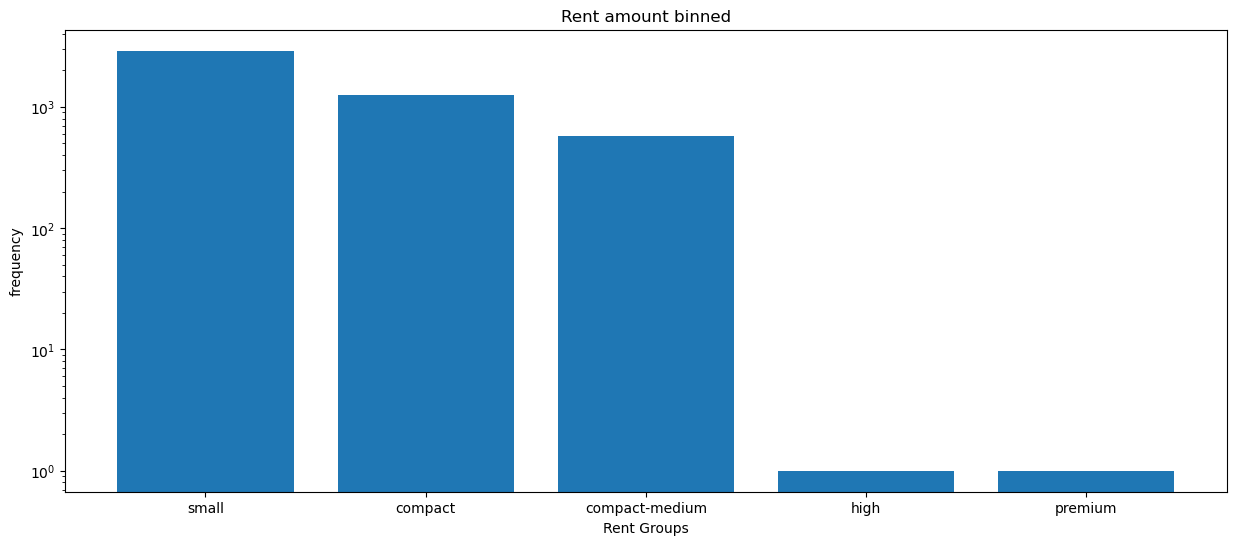

In [43]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(15,6))
ax.bar(group_names1,dt["Rent-binned"].value_counts())
ax.set_title("Rent amount binned")
ax.set_ylabel("frequency")
ax.set_xlabel("Rent Groups")
plt.semilogy()
plt.show()

#### Indicator variables / dummy variables

In [51]:
dt["Rent-binned"].value_counts().values.tolist()

[2907, 1262, 575, 1, 1]

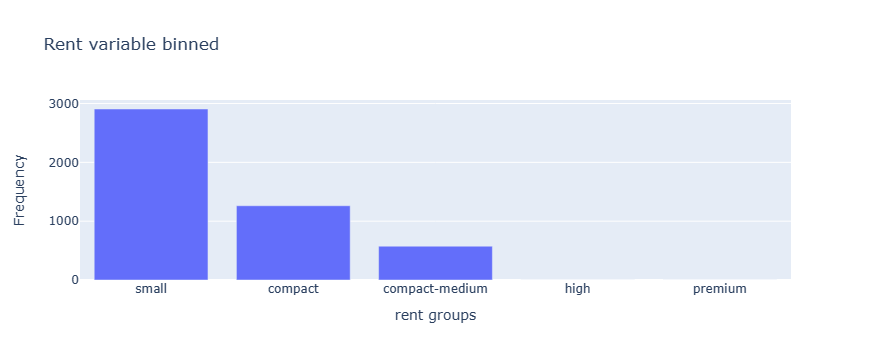

In [59]:
fig = px.bar(y=[2907, 1262, 575, 1, 1],x=group_names1,title="Rent variable binned")
fig.write_html('first_figure.html', auto_open=True)
fig.update_layout(
    xaxis_title = "rent groups",
    yaxis_title = "Frequency"
)
fig.show()


In [42]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   float64       
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point Of Contact   4746 non-null   object        
 12  Size-binned        4746 non-null   category      
 13  Rent-binned        4746 non-null   category      
dtypes: categ

In [43]:
dt["Furnishing Status"].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [44]:
dummy_var1 = pd.get_dummies(dt["Furnishing Status"])
dummy_var1 = dummy_var1.astype("int")
dummy_var1.head()

,Furnished,Semi-Furnished,Unfurnished
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


Therefore the reference class is "Furnished" for which dummy variable value is (0,0,0)

In [45]:
dt = pd.concat([dt,dummy_var1],axis=1)
dt.drop("Furnishing Status",axis=1,inplace=True)
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Tenant Preferred,Bathroom,Point Of Contact,Size-binned,Rent-binned,Furnished,Semi-Furnished,Unfurnished
0,2022-05-18,2,10000.0,1100,Ground out of 2,Super Area,Bandel,Kolkata,Bachelors/Family,2,Contact Owner,Small,Low,0,0,1
1,2022-05-13,2,20000.0,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Bachelors/Family,1,Contact Owner,Small,Low,0,1,0
2,2022-05-16,2,17000.0,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Bachelors/Family,1,Contact Owner,Small,Low,0,1,0
3,2022-07-04,2,10000.0,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Bachelors/Family,1,Contact Owner,Small,Low,0,0,1
4,2022-05-09,2,7500.0,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Bachelors,1,Contact Owner,Small,Low,0,0,1


In [47]:
dt["Tenant Preferred"].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [48]:
dummy_var2 = pd.get_dummies(dt["Tenant Preferred"])
dummy_var2 = dummy_var2.astype("int")
dummy_var2.head()

,Bachelors,Bachelors/Family,Family
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


Therefore the reference class is "Bachelors" for which dummy variable value is (0,0,0)

In [49]:
dt = pd.concat([dt,dummy_var2],axis=1)
dt.drop("Tenant Preferred",axis=1,inplace=True)
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Bathroom,Point Of Contact,Size-binned,Rent-binned,Furnished,Semi-Furnished,Unfurnished,Bachelors,Bachelors/Family,Family
0,2022-05-18,2,10000.0,1100,Ground out of 2,Super Area,Bandel,Kolkata,2,Contact Owner,Small,Low,0,0,1,0,1,0
1,2022-05-13,2,20000.0,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,Contact Owner,Small,Low,0,1,0,0,1,0
2,2022-05-16,2,17000.0,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,Contact Owner,Small,Low,0,1,0,0,1,0
3,2022-07-04,2,10000.0,800,1 out of 2,Super Area,Dumdum Park,Kolkata,1,Contact Owner,Small,Low,0,0,1,0,1,0
4,2022-05-09,2,7500.0,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,1,Contact Owner,Small,Low,0,0,1,1,0,0


In [50]:
dt.to_csv('clean_df.csv',index=False)